In [1]:
!rm -rf "/content/TaskA"
!rm -rf "/content/TaskB"
import matplotlib.pyplot as plt
from pathlib import Path
import os
import re
import shutil
import string
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import csv
import string


from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn import model_selection
from sklearn import preprocessing
from tensorflow.python.keras.preprocessing import dataset_utils
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

In [2]:
Path("/content/TaskA").mkdir(parents=True, exist_ok=True)
Path("/content/TaskB").mkdir(parents=True, exist_ok=True)
Path("/content/Data").mkdir(parents=True, exist_ok=True)


In [3]:
#Upload the data into Data folder!!!!!
dataset=open("/content/Data/olid-training-v1.0.tsv").readlines()
testsetA=open("/content/Data/testset-levela.tsv").readlines()
testsetB=open("/content/Data/testset-levelb.tsv").readlines()

def make_directories_to_fit(path,first_label,second_label):
  paths=[]
  tr_path=path+"/Train/"
  te_path=path+"/Test/"
  tr_path_off=tr_path+first_label+"/"
  tr_path_not=tr_path+second_label+"/"
  te_path_off=te_path+first_label+"/"
  te_path_not=te_path+second_label+"/"
  paths.append(tr_path)
  paths.append(te_path)
  paths.append(tr_path_off)
  paths.append(tr_path_not)
  paths.append(te_path_off)
  paths.append(te_path_not)
  for element in paths:
    Path(element).mkdir(parents=True, exist_ok=True)
make_directories_to_fit("/content/TaskA","off","not")
make_directories_to_fit("/content/TaskB","tin","unt")

In [4]:

#Don't forget to create  txt files!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
#open("/content/traindata/Test/not/not.txt",'x')
#open("/content/traindata/Test/off/off.txt",'x')
#notText=open("/content/traindata/Test/not/not.txt",'w')
#offText=open("/content/traindata/Test/off/off.txt",'w')
filter='!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n' 


def create_train_texts(train_path,first_label,second_label,label_index,symbol_filter,dataset):  
  for line in dataset:
    tokenized_line=tf.keras.preprocessing.text.text_to_word_sequence(line,filters=symbol_filter)
    length=len(tokenized_line)-4
    string=""
  
    if tokenized_line[length+label_index]==first_label:
      newFile=open(train_path+"/"+first_label+"/{0}.txt".format(tokenized_line[0]),'w')
      for i in range (1,length+1):
        string+=tokenized_line[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif tokenized_line[length+label_index]==second_label:
      newFile=open(train_path+"/"+second_label+"/{0}.txt".format(tokenized_line[0]),'w')
      for i in range (1,length+1):
        string+=tokenized_line[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
   
create_train_texts("/content/TaskA/Train","off","not",1,filter,dataset)
create_train_texts("/content/TaskB/Train","tin","unt",2,filter,dataset)

In [5]:

def create_test_dictionary(path_to_csv):
  labelA=open(path_to_csv).readlines()
  header=open(path_to_csv).readline().split(',')
  dictionary_id_category={}
  for strings in labelA:
    splitted=strings.split(',')
    dictionary_id_category[splitted[0]]=splitted[1][:-1].lower()
  dictionary_id_category[header[0]]=header[1][:-1].lower()
  print(dictionary_id_category.items())
  return dictionary_id_category
dictionaryA=create_test_dictionary("/content/Data/labels-levela.csv")
dictionaryB=create_test_dictionary("/content/Data/labels-levelb.csv")


dict_items([('15923', 'off'), ('27014', 'not'), ('30530', 'not'), ('13876', 'not'), ('60133', 'off'), ('83681', 'off'), ('96874', 'not'), ('65507', 'off'), ('78910', 'not'), ('46363', 'not'), ('68123', 'not'), ('22452', 'not'), ('15565', 'not'), ('64376', 'not'), ('12588', 'off'), ('34263', 'off'), ('65773', 'not'), ('95457', 'not'), ('24930', 'not'), ('15938', 'not'), ('45712', 'not'), ('70840', 'not'), ('53563', 'not'), ('59432', 'not'), ('21454', 'not'), ('83155', 'not'), ('69576', 'not'), ('49139', 'off'), ('76669', 'not'), ('58995', 'off'), ('88490', 'off'), ('77101', 'not'), ('86917', 'not'), ('78472', 'not'), ('17798', 'not'), ('71873', 'not'), ('30247', 'not'), ('81150', 'not'), ('46444', 'off'), ('60587', 'off'), ('70569', 'off'), ('59200', 'not'), ('30900', 'not'), ('44546', 'off'), ('53982', 'not'), ('37884', 'not'), ('15079', 'not'), ('51628', 'off'), ('30899', 'off'), ('99680', 'not'), ('38628', 'not'), ('40110', 'off'), ('50310', 'not'), ('84101', 'not'), ('84876', 'not')

In [6]:
#Test values



  
def create_test_texts(test_path,first_label,second_label,dictionary,symbol_filter,dataset):
  for line in dataset:
    string=""
    tokenized_line_test=tf.keras.preprocessing.text.text_to_word_sequence(line,filters=symbol_filter)
    if dictionary.get(tokenized_line_test[0])==first_label:
    
      newFile=open(test_path+"/"+first_label+"/{0}.txt".format(tokenized_line_test[0]),'w')
      for i in range (1,len(tokenized_line_test)):
          string+=tokenized_line_test[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif dictionary.get(tokenized_line_test[0])==second_label:
      newFile=open(test_path+"/"+second_label+"/{0}.txt".format(tokenized_line_test[0]),'w')
      for i in range (1,len(tokenized_line_test)):
          string+=tokenized_line_test[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif dictionary.get(tokenized_line_test[0])==None:
      continue
    else:
      print(dictionary.get(tokenized_line_test[0]))
create_test_texts("/content/TaskA/Test","off","not",dictionaryA,filter,testsetA)     
create_test_texts("/content/TaskB/Test","tin","unt",dictionaryB,filter,testsetB)

In [7]:
#notText=open("/content/traindata/Test/not/not.txt").read()
#offText=open("/content/traindata/Test/off/off.txt").read()
batch_size = 32
seed = 228

def generate_datasets(path_to_root_folder,batch_size,seed):
  #create training
  raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(directory=
    path_to_root_folder+"/Train",labels='inferred',
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training',seed=seed)
  #create validation
  raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path_to_root_folder+"/Train", labels='inferred',
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)  
  #create testing
  raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path_to_root_folder+"/Test", 
    batch_size=batch_size)
  return raw_train_ds,raw_val_ds,raw_test_ds

raw_train_ds,raw_val_ds,raw_test_ds=generate_datasets("/content/TaskA",batch_size,seed)
raw_train_dsB,raw_val_dsB,raw_test_dsB=generate_datasets("/content/TaskB",batch_size,seed)



for feat, targ in raw_train_ds.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))
  
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])



print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])


for text_batch, label_batch in raw_train_dsB.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])
print("Label 0 corresponds to", raw_train_dsB.class_names[0])
print("Label 1 corresponds to", raw_train_dsB.class_names[1])


Found 13240 files belonging to 2 classes.
Using 10592 files for training.
Found 13240 files belonging to 2 classes.
Using 2648 files for validation.
Found 860 files belonging to 2 classes.
Found 4400 files belonging to 2 classes.
Using 3520 files for training.
Found 4400 files belonging to 2 classes.
Using 880 files for validation.
Found 240 files belonging to 2 classes.
Features: [b'@user @user are you bipolar you keep saying different shit to people commenting on what u said \n'
 b'@user hope they bankrupt soon \n'
 b'@user whenever you conservatives whine kavanaugh is being appointed fast enough all i think of is garland never getting a hearing for a year so just shhh hypocrites \n'
 b"@user they're becoming more and more like antifa everyday \n"
 b'@user and i you ya sexy lady you \xe2\x99\xa1 \n'
 b"@user @user @user @user @user also these antifa and from hence shall be referred to as anqueefa by mesel they pretty much all live with mommy in the basement which is why they wear mas

In [8]:
max_features = 10000
#sequence of such length because the length of Twitter post is 280 symbols long
sequence_length = 280

def generate_vectorization_layer(max_features,sequence_length):
  return TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=int(sequence_length))
vectorize_layer = generate_vectorization_layer(max_features,sequence_length)
vectorize_layerB=generate_vectorization_layer(max_features,sequence_length)

In [9]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
train_textB=raw_test_dsB.map(lambda x,y:x)
vectorize_layer.adapt(train_text)
vectorize_layerB.adapt(train_textB)

In [10]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label
# retrieve a batch (of 32 reviews and labels) from the dataset

text_batch, label_batch = next(iter(raw_train_ds))
first_review=text_batch[0]
first_review, first_label = text_batch[0], label_batch[0]

print("Review", first_review)

print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

"""
text_batchB, label_batchB = next(iter(raw_train_dsB))
first_reviewB, first_labelB = text_batchB[0], label_batchB[0]

print("Review", first_reviewB)
print("Label", raw_train_dsB.class_names[first_labelB])
print("Vectorized review", vectorize_text(first_reviewB, first_labelB))
"""


Review tf.Tensor(b'@user cp24 as usual interviewing only liberals with negative reviews \n', shape=(), dtype=string)
Label not
Vectorized review (<tf.Tensor: shape=(1, 280), dtype=int64, numpy=
array([[   2, 7648,   36, 1262,    1,   85,   25,   22, 1749, 6365,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0

'\ntext_batchB, label_batchB = next(iter(raw_train_dsB))\nfirst_reviewB, first_labelB = text_batchB[0], label_batchB[0]\n\nprint("Review", first_reviewB)\nprint("Label", raw_train_dsB.class_names[first_labelB])\nprint("Vectorized review", vectorize_text(first_reviewB, first_labelB))\n'

In [11]:
print("7517 ---> ",vectorize_layer.get_vocabulary()[500])
print(" 1953 ---> ",vectorize_layer.get_vocabulary()[1953])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))
"""
print("7517 ---> ",vectorize_layerB.get_vocabulary()[500])
print(" 1953 ---> ",vectorize_layerB.get_vocabulary()[1953])
print('Vocabulary size: {}'.format(len(vectorize_layerB.get_vocabulary())))
"""

7517 --->  happen
 1953 --->  votered
Vocabulary size: 10000


'\nprint("7517 ---> ",vectorize_layerB.get_vocabulary()[500])\nprint(" 1953 ---> ",vectorize_layerB.get_vocabulary()[1953])\nprint(\'Vocabulary size: {}\'.format(len(vectorize_layerB.get_vocabulary())))\n'

In [12]:
def map_and_optimize(raw_train,raw_val,raw_test,vectorize_text):
  train_ds = raw_train.map(vectorize_text)
  val_ds = raw_val.map(vectorize_text)
  test_ds = raw_test.map(vectorize_text)

  #optimization
  AUTOTUNE = tf.data.AUTOTUNE

  train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
  val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
  test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
  return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds=map_and_optimize(raw_train_ds,raw_val_ds,raw_test_ds,vectorize_text)
train_dsB,val_dsB,test_dsB=map_and_optimize(raw_train_dsB,raw_val_dsB,raw_test_dsB,vectorize_text)

In [13]:




#Callback function to stop overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [14]:
embedding_dim = 48
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 48)          480048    
_________________________________________________________________
dropout (Dropout)            (None, None, 48)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 48)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 49        
Total params: 480,097
Trainable params: 480,097
Non-trainable params: 0
_________________________________________________________________


In [15]:
# for some reason, in the tutorial the threshold is 0.0, which, in my opinion, is too unfair
model.compile(loss=losses.BinaryCrossentropy(from_logits=True,label_smoothing=0.15),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))
#(from_logits=False)

In [16]:



epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/30
331/331 [==============================] - 7s 20ms/step - loss: 0.6551 - binary_accuracy: 0.6650 - val_loss: 0.6446 - val_binary_accuracy: 0.6782
Epoch 2/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6501 - binary_accuracy: 0.6650 - val_loss: 0.6433 - val_binary_accuracy: 0.6782
Epoch 3/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6478 - binary_accuracy: 0.6650 - val_loss: 0.6417 - val_binary_accuracy: 0.6782
Epoch 4/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6444 - binary_accuracy: 0.6650 - val_loss: 0.6396 - val_binary_accuracy: 0.6782
Epoch 5/30
331/331 [==============================] - 4s 11ms/step - loss: 0.6398 - binary_accuracy: 0.6650 - val_loss: 0.6370 - val_binary_accuracy: 0.6782
Epoch 6/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6340 - binary_accuracy: 0.6650 - val_loss: 0.6338 - val_binary_accuracy: 0.6782
Epoch 7/30
331/331 [==============================] - 4s 1

In [17]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

27/27 [==============================] - 0s 7ms/step - loss: 0.5637 - binary_accuracy: 0.7802
Loss:  0.5636753439903259
Accuracy:  0.7802325487136841


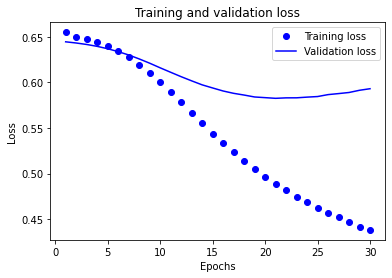

In [18]:
history_dict = history.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

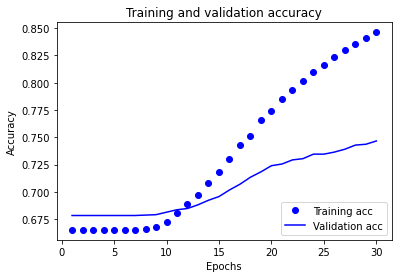

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [20]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "MAGA TRUMP MAGA TRUMP WON",
  "JOE BIDEN JOE BIDEN VOTE BLUE NO MATTER WHO",
  "NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER",
  "Nigger is an offensive and derogatory word that is used to insulf all people of color (not only afro-americans) ",
  "Love is good, I love everyone and wish you all the best things in life",
  "Believe in Jesus and he will believe in you",
  "Democracy is one of the most important aspect of every US cityzen's life",
  "TRUMP",
  "BIDEN",
  "#MAGA",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD  ALLAH",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD JESUS ALLAH Jesus Jesus",
]
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)
export_model.predict(examples)

27/27 [==============================] - 1s 7ms/step - loss: 0.4773 - accuracy: 0.7791
0.7790697813034058


array([[0.22029653],
       [0.38951546],
       [0.81567794],
       [0.2527153 ],
       [0.04491523],
       [0.42656225],
       [0.06652483],
       [0.25330746],
       [0.26668292],
       [0.25095835],
       [0.51110613],
       [0.7894826 ]], dtype=float32)

In [21]:
embedding_dim = 64
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.1),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.1),
  layers.Dense(1)
  ])

In [22]:
# for some reason, in the tutorial the threshold is 0.0, which, in my opinion, is too unfair
model.compile(loss=losses.BinaryCrossentropy
(from_logits=True,label_smoothing=0),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))
#(from_logits=False)

In [23]:


model.summary()
epochs = 30
historyB = model.fit(
    train_dsB,
    validation_data=val_dsB,
    epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640064    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
110/110 [==============================] - 3s 24ms/step - loss: 0.5047 - binary_accuracy: 0.8787 - val_

In [24]:
lossB, accuracyB = model.evaluate(test_dsB)

print("Loss: ", lossB)
print("Accuracy: ", accuracyB)

8/8 [==============================] - 0s 3ms/step - loss: 0.2948 - binary_accuracy: 0.8875
Loss:  0.29477736353874207
Accuracy:  0.887499988079071


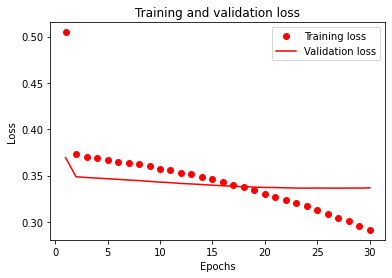

In [25]:
history_dictB = historyB.history
history_dictB.keys()
accB = history_dictB['binary_accuracy']
val_accB = history_dictB['val_binary_accuracy']
lossB = history_dictB['loss']
val_lossB = history_dictB['val_loss']

epochs = range(1, len(accB) + 1)

# "ro" is for "red dot"
plt.plot(epochs, lossB, 'ro', label='Training loss')
# r is for "solid blue line"
plt.plot(epochs, val_lossB, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

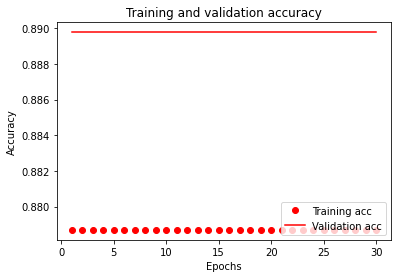

In [26]:
plt.plot(epochs, accB, 'ro', label='Training acc')
plt.plot(epochs, val_accB, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

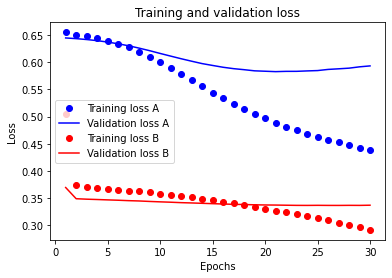

In [27]:
loss = history_dict['loss']
plt.plot(epochs, loss, 'bo', label='Training loss A')
plt.plot(epochs, val_loss, 'b', label='Validation loss A')
plt.plot(epochs, lossB, 'ro', label='Training loss B')
plt.plot(epochs, val_lossB, 'r', label='Validation loss B')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

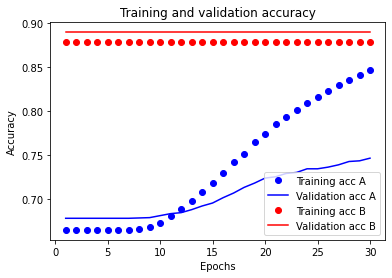

In [28]:
plt.plot(epochs, acc, 'bo', label='Training acc A')
plt.plot(epochs, val_acc, 'b', label='Validation acc A')
plt.plot(epochs, accB, 'ro', label='Training acc B')
plt.plot(epochs, val_accB, 'r', label='Validation acc B')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [29]:
export_modelB = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_modelB.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "You are a dumb retard, you are an asshole and you shoudl kill yourself, you are an idiot, you are a bigot",
  " dumb retard, an asshole and should kill oneself , an idiot, a bigot",
  "you are an IDIOT!",
  "IDIOT!",
  "You are the worst President in the hisotry of the US, I can't wait till you will be out of office. You are a nazi",
  "The worst   in the hisotry of the US, I can't wait till  will be out of office.  are a nazi",
  "You are like Hitler, dumb retarded nigger, KYS",
  "I am like Hitler, dumb retarded nigger, KYS",
  "He is like Hitler, dumb retarded nigger, KYS",
  "She is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is the worst Presiden in the history of the US",
  "Joe Biden is the worst Presiden in the history of the US",
  "Vladimir Putin is the worst Presiden in the history of Russia",
  "Donald Trump is the best President in the history of the US",
  " people,  white males are racists,  OF THEM, EVERY.SINGLE.ONE, they are bigots and dumb "
]
loss, accuracy = export_model.evaluate(raw_test_dsB)
print(accuracy)
export_modelB.predict(examples)

8/8 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.6375
0.637499988079071


array([[0.05107403],
       [0.16256478],
       [0.18259785],
       [0.22924864],
       [0.03732833],
       [0.06804854],
       [0.15583342],
       [0.2268888 ],
       [0.1429174 ],
       [0.16418841],
       [0.13193935],
       [0.10216892],
       [0.1346676 ],
       [0.1319511 ],
       [0.10849571],
       [0.13104811]], dtype=float32)

In [30]:
file = open('/content/olid-training-v1.0.tsv', 'r')
Lines = file.readlines()
 

all_lines=[]

for line in Lines:
    splitted=line.split()
    splitted_list=[]
    tweet=''
    length=len(splitted)
    splitted_list.append(splitted[0])
    for i in range(1,length-3):
      tweet+=splitted[i] + " "
    tweet=tweet.lower().strip('!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n' )
    splitted_list.append(tweet)
    splitted_list.append(splitted[length-3])
    splitted_list.append(splitted[length-2])
    all_lines.append(splitted_list)
print(all_lines[:5])
all_lines=all_lines[1:]
df = pd.DataFrame(all_lines, columns =['id', 'tweet', 'subtask_a','subtask_b'])



testing_values_a = open('/content/testset-levela.tsv', 'r')
Lines_values = testing_values_a.readlines()
testing_labels_a = open('/content/labels-levela.csv', 'r')
Lines_labels = testing_labels_a.readlines()
Lines_values=Lines_values[1:]

all_lines=[]
count=0
for line in zip(Lines_values,Lines_labels):
    splitted=line[0].split()
    splitted_labels=line[1].split(',')
    splitted_list=[]
    tweet=''
    length=len(splitted)
    splitted_list.append(splitted[0])
    for i in range(1,length):
      tweet+=splitted[i] + " "
    tweet=tweet.lower().strip('!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n' )
    splitted_list.append(tweet)
    splitted_list.append(splitted_labels[1])
    count+=1
    all_lines.append(splitted_list)

print(all_lines[:5])

df_testing = pd.DataFrame(all_lines, columns =['id', 'tweet', 'subtask_a'])
target_a_testing_labels=df_testing.pop('subtask_a')
target_a_testing=df_testing.drop(columns=['id'])

target_a=df.pop('subtask_a')
target_b=df.pop('subtask_b')


[['id', 'tweet ', 'subtask_a', 'subtask_b'], ['86426', '@user she should ask a few native americans what their take on this is. ', 'OFF', 'UNT'], ['90194', '@user @user go home you’re drunk!!! @user #maga #trump2020 👊🇺🇸👊 url ', 'OFF', 'TIN'], ['16820', 'amazon is investigating chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. url #amazon #maga #kag #china #tcot ', 'NOT', 'NULL'], ['62688', '@user someone should\'vetaken"" this piece of shit to a volcano. 😂""" ', 'OFF', 'UNT']]
[['15923', '#whoisq #wherestheserver #dumpnike #declasfisa democrats support antifa, muslim brotherhood, ms13, isis, pedophilia, child trafficking, taxpayer funded abortion’s, election fraud, sedition and treason!!! #lockthemallup #wwg1wga #qanon \u2066@user url ', 'OFF\n'], ['27014', '#constitutionday is revered by conservatives, hated by progressives/socialist/democrats that want to change it. ', 'NOT\n'], ['30530', '#foxnews #nra #maga #p

In [31]:
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(df.values, target_a.values, test_size=0.20, random_state=33)
training_x=pd.DataFrame(X_train_a,columns =['id', 'tweet'] )
training_Y=pd.DataFrame(y_train_a,columns =['subtask_a'] )

validation_x=pd.DataFrame(X_train_a,columns =['id', 'tweet'] ).drop(columns=['id'])
validation_y=pd.DataFrame(y_train_a,columns =['subtask_a'] )

lb = preprocessing.LabelBinarizer()
training_Y = lb.fit_transform(training_Y)
validation_y = lb.fit_transform(training_Y)

target_a_testing_labels=lb.fit_transform(target_a_testing_labels)

training_x = training_x.drop(columns=['id'])
training_Y=pd.DataFrame(training_Y,columns =['subtask_a'] )
training_a=pd.concat([training_x ,training_Y],axis=1)

dataset_a = tf.data.Dataset.from_tensor_slices((training_x,training_Y))
dataset_a_valid= tf.data.Dataset.from_tensor_slices((validation_x,validation_y))
dataset_a_testing=tf.data.Dataset.from_tensor_slices((target_a_testing.values,target_a_testing_labels))
dataset_a=dataset_a.batch(32)
dataset_a_valid=dataset_a_valid.batch(32)
dataset_a_testing.batch(32)
print(dataset_a)
print(dataset_a_valid)
print(dataset_a_testing)




<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.string, tf.int64)>
<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.string, tf.int64)>
<TensorSliceDataset shapes: ((1,), (1,)), types: (tf.string, tf.int64)>


In [32]:
max_features = 10000
#sequence of such length because the length of Twitter post is 280 symbols long
sequence_length = 280
vectorize_layer = TextVectorization(
 max_tokens=max_features,
 output_mode='int',
 output_sequence_length=int(sequence_length))
# Make a text-only dataset (without labels), then call adapt
train_text = dataset_a.map(lambda x, y: x)
#train_textB=raw_test_dsB.map(lambda x,y:x)
vectorize_layer.adapt(train_text)
#vectorize_layerB.adapt(train_textB)




In [33]:
def vectorize_text(text, label):
  #text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label
# retrieve a batch (of 32 reviews and labels) from the dataset

text_batch, label_batch = next(iter(dataset_a))
first_review=text_batch[0]
first_review, first_label = text_batch[0], label_batch[0]

print("Review", first_review)

#print("Label", dataset_a.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor([b'@user @user @user how do you come up with all these lies. you have not done a thing as far as gun control. open your eyes obama your hero had 8 years in office. all your doing is sucking around for the last minute vote. '], shape=(1,), dtype=string)
Vectorized review (<tf.Tensor: shape=(1, 280), dtype=int64, numpy=
array([[   2,    2,    2,   52,   45,    8,  220,   60,   23,   30,  108,
         374,    8,   25,   21,  244,    6,  160,   36,  266,   36,   26,
          29,  481,   32, 1044,  258,   32, 1434,  121, 1308,  151,   13,
         575,   30,   32,  149,    4, 2789,  302,   15,    3,  265, 1501,
         125,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    

In [34]:
print("7517 ---> ",vectorize_layer.get_vocabulary()[500])
print(" 1953 ---> ",vectorize_layer.get_vocabulary()[1953])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))


7517 --->  sucks
 1953 --->  sending
Vocabulary size: 10000


In [35]:
def map_and_optimize(raw_train,raw_val,raw_test,vectorize_text):
  train_ds = raw_train.map(vectorize_text)
  val_ds = raw_val.map(vectorize_text)
  test_ds = raw_test.map(vectorize_text)

  #optimization
  AUTOTUNE = tf.data.AUTOTUNE

  train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
  val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
  test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
  return train_ds,val_ds,test_ds

dataset_a_finished,dataset_a_valid_finished,dataset_a_testing_finished=map_and_optimize(dataset_a,dataset_a_valid,dataset_a_testing,vectorize_text)



In [36]:
embedding_dim = 48
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 48)          480048    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 48)          0         
_________________________________________________________________
global_average_pooling1d_2 ( (None, 48)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 49        
Total params: 480,097
Trainable params: 480,097
Non-trainable params: 0
_________________________________________________________________


In [37]:
# for some reason, in the tutorial the threshold is 0.0, which, in my opinion, is too unfair
model.compile(loss=losses.BinaryCrossentropy(from_logits=True,label_smoothing=0.15),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.3))


In [38]:
epochs = 30
history = model.fit(
    dataset_a_finished,
    validation_data=dataset_a_valid_finished,
    epochs=epochs)

Epoch 1/30
331/331 [==============================] - 5s 14ms/step - loss: 0.6531 - binary_accuracy: 0.6680 - val_loss: 0.6495 - val_binary_accuracy: 0.6680
Epoch 2/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6495 - binary_accuracy: 0.6680 - val_loss: 0.6474 - val_binary_accuracy: 0.6680
Epoch 3/30
331/331 [==============================] - 4s 13ms/step - loss: 0.6468 - binary_accuracy: 0.6680 - val_loss: 0.6444 - val_binary_accuracy: 0.6680
Epoch 4/30
331/331 [==============================] - 4s 13ms/step - loss: 0.6434 - binary_accuracy: 0.6680 - val_loss: 0.6403 - val_binary_accuracy: 0.6680
Epoch 5/30
331/331 [==============================] - 4s 12ms/step - loss: 0.6385 - binary_accuracy: 0.6680 - val_loss: 0.6348 - val_binary_accuracy: 0.6680
Epoch 6/30
331/331 [==============================] - 4s 13ms/step - loss: 0.6328 - binary_accuracy: 0.6680 - val_loss: 0.6282 - val_binary_accuracy: 0.6680
Epoch 7/30
331/331 [==============================] - 4s 1

In [39]:
loss, accuracy = model.evaluate(dataset_a_testing_finished)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

860/860 [==============================] - 1s 1ms/step - loss: 0.5598 - binary_accuracy: 0.7802
Loss:  0.5597977638244629
Accuracy:  0.7802325487136841


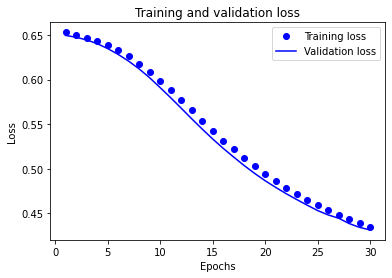

In [40]:
history_dict = history.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

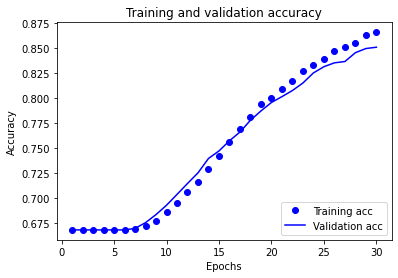

In [41]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [42]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "MAGA TRUMP MAGA TRUMP WON",
  "JOE BIDEN JOE BIDEN VOTE BLUE NO MATTER WHO",
  "NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER",
  "Nigger is an offensive and derogatory word that is used to insulf all people of color (not only afro-americans) ",
  "Love is good, I love everyone and wish you all the best things in life",
  "Believe in Jesus and he will believe in you",
  "Democracy is one of the most important aspect of every US cityzen's life",
  "TRUMP",
  "BIDEN",
  "#MAGA",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD  ALLAH",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD JESUS ALLAH Jesus Jesus",
]
loss, accuracy = export_model.evaluate(dataset_a_testing)
print(accuracy)
export_model.predict(examples)


860/860 [==============================] - 1s 1ms/step - loss: 0.4706 - accuracy: 0.7860
0.7860465049743652


array([[0.29088283],
       [0.28345633],
       [0.6954864 ],
       [0.30615252],
       [0.04440102],
       [0.3359507 ],
       [0.09223202],
       [0.24702436],
       [0.24494675],
       [0.23304603],
       [0.5856401 ],
       [0.6374905 ]], dtype=float32)

In [43]:
file = open('/content/olid-training-v1.0.tsv', 'r')
Lines = file.readlines()
 

all_lines=[]

for line in Lines:
    splitted=line.split()
    splitted_list=[]
    tweet=''
    length=len(splitted)
    splitted_list.append(splitted[0])
    for i in range(1,length-3):
      tweet+=splitted[i] + " "
    tweet=tweet.lower().strip('!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n' )
    splitted_list.append(tweet)
    splitted_list.append(splitted[length-3])
    second_atribute=splitted[length-2]
    splitted_list.append(second_atribute)
    if second_atribute =="UNT" or second_atribute =="TIN":
      all_lines.append(splitted_list)
print(all_lines[:5])
all_lines=all_lines[1:]
df = pd.DataFrame(all_lines, columns =['id', 'tweet', 'subtask_a','subtask_b'])
labels_b = df.pop('subtask_b')
df=df.drop(columns=['id','subtask_a'])
df.head()
labels_b

[['86426', '@user she should ask a few native americans what their take on this is. ', 'OFF', 'UNT'], ['90194', '@user @user go home you’re drunk!!! @user #maga #trump2020 👊🇺🇸👊 url ', 'OFF', 'TIN'], ['62688', '@user someone should\'vetaken"" this piece of shit to a volcano. 😂""" ', 'OFF', 'UNT'], ['97670', '@user liberals are all kookoo !!! ', 'OFF', 'TIN'], ['77444', '@user @user oh noes! tough shit. ', 'OFF', 'UNT']]


0       TIN
1       UNT
2       TIN
3       UNT
4       TIN
       ... 
4394    TIN
4395    TIN
4396    TIN
4397    TIN
4398    UNT
Name: subtask_b, Length: 4399, dtype: object

In [44]:
testing_values_b = open('/content/testset-levelb.tsv', 'r')
Lines_values = testing_values_b.readlines()
testing_labels_b = open('/content/labels-levelb.csv', 'r')
Lines_labels = testing_labels_b.readlines()
Lines_values=Lines_values[1:]


all_lines=[]

for line in zip(Lines_values,Lines_labels):
    splitted=line[0].split()
    splitted_labels=line[1].split(',')
    splitted_list=[]
    tweet=''
    length=len(splitted)
    splitted_list.append(splitted[0])
    for i in range(1,length):
      tweet+=splitted[i] + " "
    tweet=tweet.lower().strip('!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n' )
    splitted_list.append(tweet)
    label=splitted_labels[1]
    #print(label)
    
    if label =="UNT\n" or label =="TIN\n":
      splitted_list.append(label)
      all_lines.append(splitted_list)
    else:
      print(label)
    
print(all_lines[:5])
df_testing_b = pd.DataFrame(all_lines, columns =['id', 'tweet','subtask_b'])
labels_b_test = df_testing_b.pop('subtask_b')
df_testing_b=df_testing_b.drop(columns=['id'])
df_testing_b.head()

[['15923', '#whoisq #wherestheserver #dumpnike #declasfisa democrats support antifa, muslim brotherhood, ms13, isis, pedophilia, child trafficking, taxpayer funded abortion’s, election fraud, sedition and treason!!! #lockthemallup #wwg1wga #qanon \u2066@user url ', 'TIN\n'], ['60133', '#nopasaran: unity demo to oppose the far-right in #london – #antifa #oct13 — enough is enough! url ', 'TIN\n'], ['83681', ' . . what the fuck did he do this time? ', 'TIN\n'], ['65507', '@user do you get the feeling he is kissing @user behind so he can humiliate him later? ', 'TIN\n'], ['12588', '@user nigga ware da hits at ', 'UNT\n']]


,tweet
0,#whoisq #wherestheserver #dumpnike #declasfisa...
1,#nopasaran: unity demo to oppose the far-right...
2,. . what the fuck did he do this time?
3,@user do you get the feeling he is kissing @us...
4,@user nigga ware da hits at


In [45]:
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(df.values, labels_b.values, test_size=0.20, random_state=33)
training_x=pd.DataFrame(X_train_b,columns =['tweet'] )
training_Y=pd.DataFrame(y_train_b,columns =['subtask_b'] )

validation_x=pd.DataFrame(X_train_b,columns =[ 'tweet'] )
validation_y=pd.DataFrame(y_train_b,columns =['subtask_b'] )

lb = preprocessing.LabelBinarizer()
training_Y = lb.fit_transform(training_Y)
validation_y = lb.fit_transform(training_Y)

labels_b_test=lb.fit_transform(labels_b_test)


training_Y=pd.DataFrame(training_Y,columns =['subtask_b'] )
training_b=pd.concat([training_x ,training_Y],axis=1)

dataset_b = tf.data.Dataset.from_tensor_slices((training_x,training_Y))
dataset_b_valid= tf.data.Dataset.from_tensor_slices((validation_x,validation_y))
dataset_b_testing=tf.data.Dataset.from_tensor_slices((df_testing_b.values,labels_b_test))
dataset_b=dataset_b.batch(32)
dataset_b_valid=dataset_b_valid.batch(32)
dataset_b_testing.batch(32)
print(dataset_b)
print(dataset_b_valid)
print(dataset_b_testing)

<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.string, tf.int64)>
<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.string, tf.int64)>
<TensorSliceDataset shapes: ((1,), (1,)), types: (tf.string, tf.int64)>


In [46]:
max_features = 10000
#sequence of such length because the length of Twitter post is 280 symbols long
sequence_length = 280


train_text = dataset_b.map(lambda x, y: x)

vectorize_layer.adapt(train_text)



In [47]:
dataset_b_finished,dataset_b_valid_finished,dataset_b_testing_finished=map_and_optimize(dataset_b,dataset_b_valid,dataset_b_testing,vectorize_text)







In [48]:
embedding_dim = 64
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640064    
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True,label_smoothing=0.15),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

In [50]:
epochs = 100
historyB = model.fit(
    dataset_b_finished,
    validation_data=dataset_b_valid_finished,
    epochs=epochs)

Epoch 1/100
110/110 [==============================] - 3s 18ms/step - loss: 0.5482 - binary_accuracy: 0.8798 - val_loss: 0.4718 - val_binary_accuracy: 0.8798
Epoch 2/100
110/110 [==============================] - 2s 16ms/step - loss: 0.4697 - binary_accuracy: 0.8798 - val_loss: 0.4674 - val_binary_accuracy: 0.8798
Epoch 3/100
110/110 [==============================] - 2s 16ms/step - loss: 0.4671 - binary_accuracy: 0.8798 - val_loss: 0.4664 - val_binary_accuracy: 0.8798
Epoch 4/100
110/110 [==============================] - 2s 16ms/step - loss: 0.4675 - binary_accuracy: 0.8798 - val_loss: 0.4655 - val_binary_accuracy: 0.8798
Epoch 5/100
110/110 [==============================] - 2s 16ms/step - loss: 0.4666 - binary_accuracy: 0.8798 - val_loss: 0.4644 - val_binary_accuracy: 0.8798
Epoch 6/100
110/110 [==============================] - 2s 16ms/step - loss: 0.4653 - binary_accuracy: 0.8798 - val_loss: 0.4633 - val_binary_accuracy: 0.8798
Epoch 7/100
110/110 [==============================]

In [51]:
lossB, accuracyB = model.evaluate(dataset_b_finished)

print("Loss: ", lossB)
print("Accuracy: ", accuracyB)

110/110 [==============================] - 0s 2ms/step - loss: 0.3043 - binary_accuracy: 0.9650
Loss:  0.30427247285842896
Accuracy:  0.9650468826293945


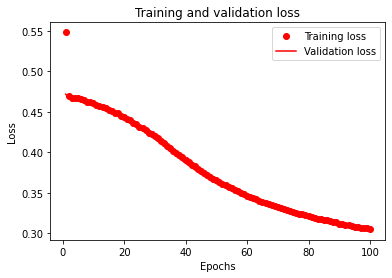

In [52]:
history_dictB = historyB.history
history_dictB.keys()
accB = history_dictB['binary_accuracy']
val_accB = history_dictB['val_binary_accuracy']
lossB = history_dictB['loss']
val_lossB = history_dictB['val_loss']

epochs = range(1, len(accB) + 1)

# "ro" is for "red dot"
plt.plot(epochs, lossB, 'ro', label='Training loss')
# r is for "solid blue line"
plt.plot(epochs, val_lossB, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

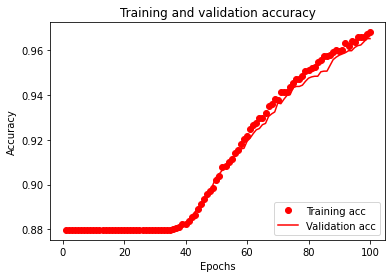

In [53]:
plt.plot(epochs, accB, 'ro', label='Training acc')
plt.plot(epochs, val_accB, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [54]:
export_modelB = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_modelB.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "You are a dumb retard, you are an asshole and you shoudl kill yourself, you are an idiot, you are a bigot",
  " dumb retard, an asshole and should kill oneself , an idiot, a bigot",
  "you are an IDIOT!",
  "IDIOT!",
  "You are the worst President in the hisotry of the US, I can't wait till you will be out of office. You are a nazi",
  "The worst   in the hisotry of the US, I can't wait till  will be out of office.  are a nazi",
  "You are like Hitler, dumb retarded nigger, KYS",
  "I am like Hitler, dumb retarded nigger, KYS",
  "He is like Hitler, dumb retarded nigger, KYS",
  "She is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is the worst Presiden in the history of the US",
  "Joe Biden is the worst Presiden in the history of the US",
  "Vladimir Putin is the worst Presiden in the history of Russia",
  "Donald Trump is the best President in the history of the US",
  " people,  white males are racists,  OF THEM, EVERY.SINGLE.ONE, they are bigots and dumb "
]
loss, accuracy = export_model.evaluate(dataset_b_testing)
print(accuracy)
export_modelB.predict(examples)

240/240 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.7250
0.7250000238418579


array([[0.02706984],
       [0.11401805],
       [0.23664618],
       [0.27886373],
       [0.08221951],
       [0.19407955],
       [0.04119518],
       [0.05119544],
       [0.03460202],
       [0.04113361],
       [0.03523779],
       [0.11416358],
       [0.14735845],
       [0.12532884],
       [0.1554372 ],
       [0.40947038]], dtype=float32)